This notebook employs random number sampling to generate power law gamma ray distributions of size N as well as the gamma ray's traversed path a long a detector of some material where the photon has mean free path $\lambda$.


In [101]:
#%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from simple_mc_funcs import*
import math

In [102]:
# Color blind friendly colors
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','olive']

Generating random uniform distributions of different gamma-ray event sizes. 

In [103]:
sizes = [100]
uniforms = []
for size in sizes:
    uniforms.append(np.random.uniform(0,1,size))

Generating power-laws and exponentially decaying distributions

In [104]:
gamma=2.4
E_max=40
pow_dists = []
exp_dists = []
for dists in uniforms:
    powlawdist = pow_dists.append(powlaw_inversecdf(dists,
                                                    E_0=10.,
                                                    gamma=gamma,
                                                    E_max=E_max))
    exp_dists.append(exp_inversecdf(dists))

Testing the generated power law distributions.

bins=4
bins=4
bins=4


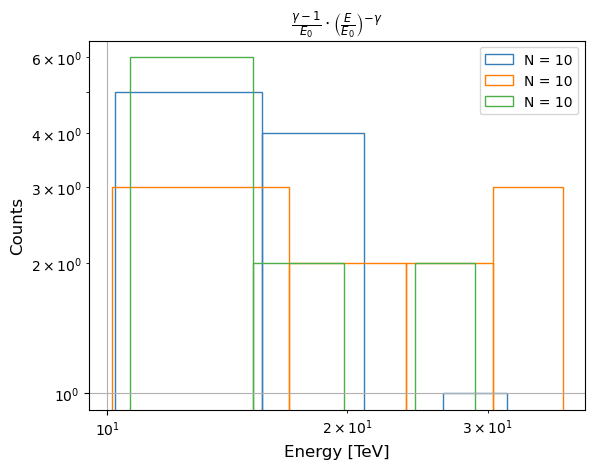

In [105]:
a=0
b=9
for dists, color in zip(pow_dists[a:b], colors[a:b]):
    print('bins={}'.format(math.ceil(np.sqrt(len(dists)))))
    plt.hist(dists, 
            bins=math.ceil(np.sqrt(len(dists))),
            density=False,
            label='N = {}'.format(len(dists)),
            fill=False,
            edgecolor=color)
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Energy [TeV]', fontsize=12)
plt.semilogy()
plt.semilogx()
plt.title(r'$\frac{\gamma-1}{E_0} \cdot \left( \frac{E}{E_0} \right)^{-\gamma} $')
plt.legend()
plt.grid()
#plt.xlim(0,30);

In [106]:
plt.close()

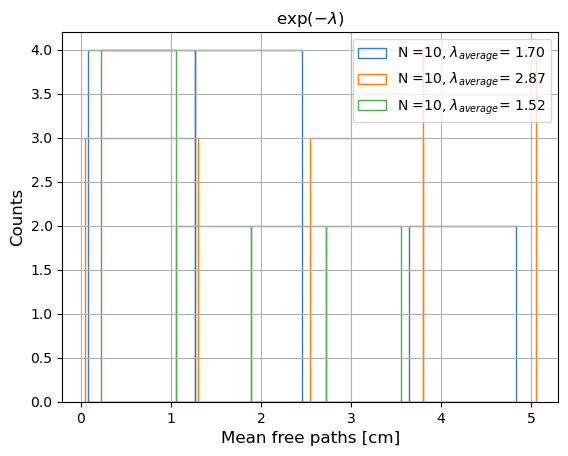

In [107]:
# Plotting distributions that were sampled from exponentials distributions of different sizes.
a=0
b=9
for dists, color in zip(exp_dists[a:b], colors[a:b]):
    plt.hist(dists, 
            bins=math.ceil(np.sqrt(len(dists))),
            density=False,
            label=r'N ='+'{}'.format(len(dists))+r', $\lambda_{average}$'+'= {:.2f}'.format(np.mean(dists)),
            fill=False,
            edgecolor=color)
plt.ylabel('Counts',fontsize=12)
plt.xlabel(r'Mean free paths [cm]', fontsize=12)
plt.title(r'$\exp({- \lambda})$')
plt.legend()
plt.grid();

In [108]:
plt.close()

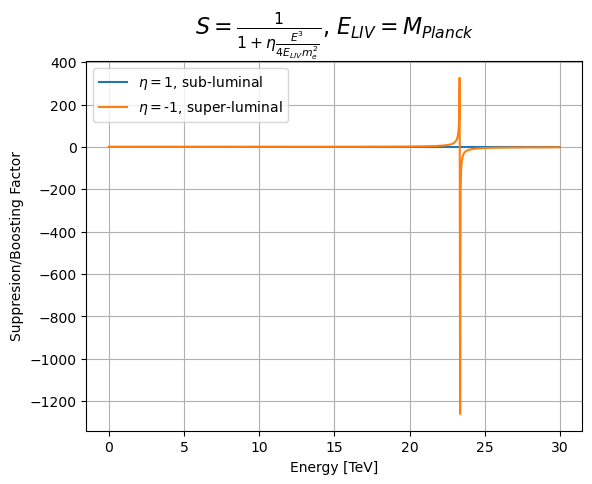

In [109]:
# Plotting the suppresion factor as a function of energy
energy = np.linspace(0,30,1000)
plt.plot(energy, SB_factor(energy,n=1), label=r'$\eta=${}, sub-luminal'.format(1))
plt.plot(energy, SB_factor(energy,n=-1), label=r'$\eta=${}, super-luminal'.format(-1))
plt.xlabel('Energy [TeV]')
plt.ylabel('Suppresion/Boosting Factor')
plt.title(r'$S=\frac{1}{1+\eta \frac{E^{3}}{4E_{LIV} m_e^2}}}$'+', '+r'$E_{LIV}=M_{Planck}$',
          fontsize=16)
plt.grid()
plt.legend();

In [110]:
plt.close()

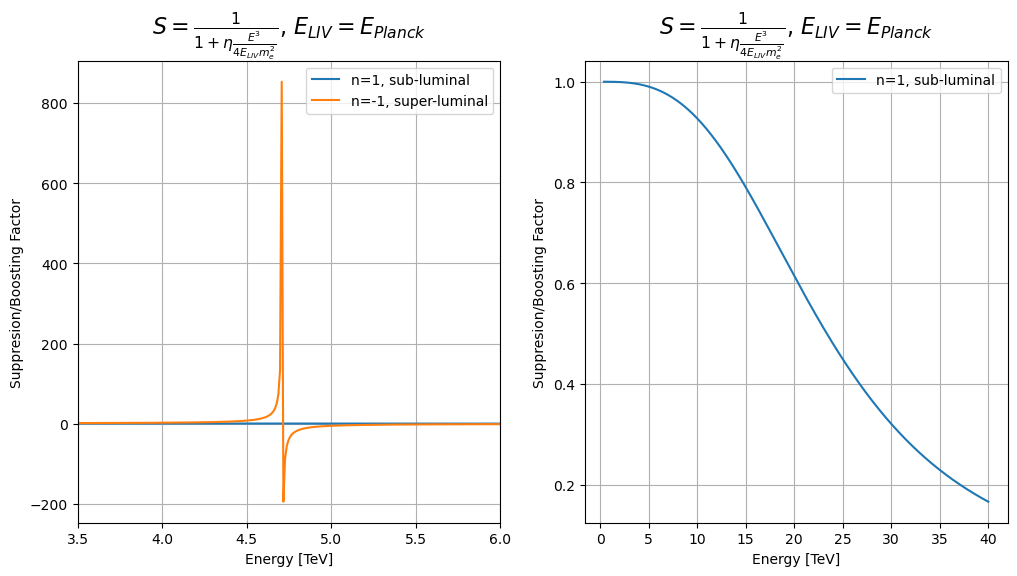

In [111]:
# Investigating suppression factor features
fig, axs = plt.subplots(1,2, figsize=(12,6))
energy = np.linspace(0.4,40,4000)
axs[0].plot(energy, SB_factor(energy,n=1,E_LIV=1e14), label='n={}, sub-luminal'.format(1))
axs[0].plot(energy, SB_factor(energy,n=-1,E_LIV=1e14), label='n={}, super-luminal'.format(-1))
axs[0].set_xlabel('Energy [TeV]')
axs[0].set_ylabel('Suppresion/Boosting Factor')
axs[0].set_title(r'$S=\frac{1}{1+\eta \frac{E^{3}}{4E_{LIV} m_e^2}}}$'+', '+r'$E_{LIV}=E_{Planck}$',
          fontsize=16)
axs[0].set_xlim(3.5,6)
axs[0].grid()
axs[0].legend()

axs[1].plot(energy, SB_factor(energy,n=1), label='n={}, sub-luminal'.format(1))
#axs[1].plot(energy, SB_factor(energy,n=-1), label='n={}, super-luminal'.format(-1))
axs[1].set_xlabel('Energy [TeV]')
axs[1].set_ylabel('Suppresion/Boosting Factor')
axs[1].set_title(r'$S=\frac{1}{1+\eta \frac{E^{3}}{4E_{LIV} m_e^2}}}$'+', '+r'$E_{LIV}=E_{Planck}$',
          fontsize=16)
#axs[1].set_xlim(4,10)
axs[1].grid()
axs[1].legend()

In [112]:
plt.close()

In [113]:
# Parameters of interest
n_air = 0.02504e21 #atom/cm^3
Z_air = 7.0 # nitrogen atomic number

n_W = 6.31e22 # atom/cm^3
Z_w = 74. # tungsten atomic number

n_CsI = 1.05e22 # atom/cm^3

lambda_air = bhcs_mean_path(n=n_air,Z=Z_air) # cm
lambda_w = bhcs_mean_path(n=n_W,Z=Z_w) # cm

cs_W = bh_cs_ultra(74)

In [114]:
# Investigating the true cross section to use
CsI_truemeanpath = 9/7*1.86 #cm
CsI_density = 4.51 # g/cm^3
CsI_molmass = 259.81 #g/mol
N_a = 6.022e23 # atoms/mol
CsI_numdensity = CsI_density/CsI_molmass*N_a # atoms/cm^3
CsI_truecs = 1/(CsI_truemeanpath*CsI_numdensity) # cm^2
CsI_Z = 108.
print('CsI pair production = {:.2f} barns'.format(CsI_truecs*1e24))

CsI pair production = 40.00 barns


In [115]:
# Empty arrays to store sampled mean-free paths from distributions
lambda_measured = []
for i in pow_dists:
    lambda_measured.append(np.zeros(len(i)))

In [116]:
# Sampling a traversed path for every energy using a large sized traversed path sample.

u = np.random.uniform(0,1,1000000)
path_samples = exp_inversecdf(u)

for E_dist,lambda_meas_dist in zip(pow_dists,lambda_measured):
    for i,energy in enumerate(E_dist):
        x = np.random.choice(path_samples)
        lambda_meas_dist[i] = x

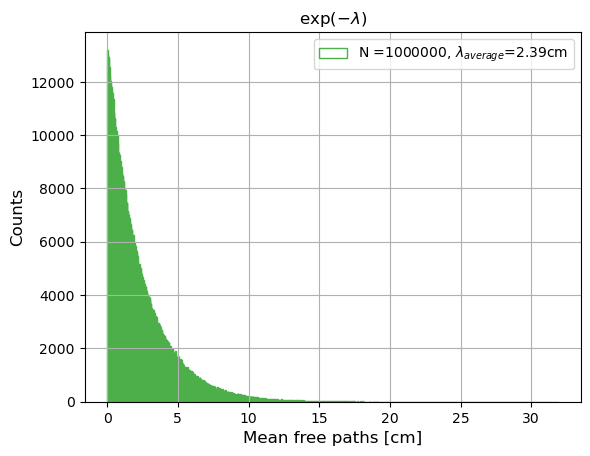

In [117]:
plt.hist(path_samples, 
        bins=math.ceil(np.sqrt(len(path_samples))),
        density=False,
        label=r'N ='+'{}'.format(len(path_samples))+r', $\lambda_{average}$'+'={:.2f}cm'.format(np.mean(path_samples)),
        fill=False,
        edgecolor=color)
plt.ylabel('Counts',fontsize=12);
plt.xlabel(r'Mean free paths [cm]', fontsize=12)
plt.title(r'$\exp({- \lambda})$')
plt.legend()
plt.grid();

In [118]:
plt.close()

bins=4
bins=4
bins=4


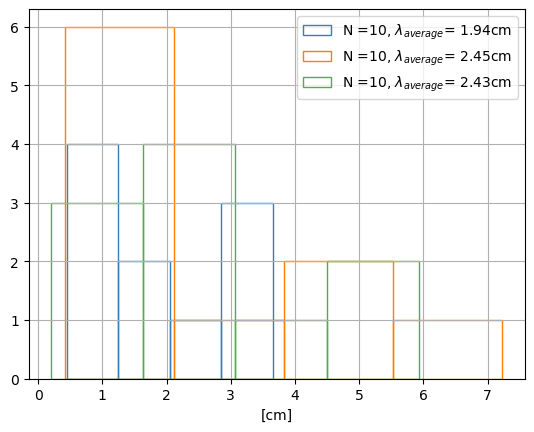

In [119]:
# Checking measured traversed path distributions
a = 0
b = 10
for dists, color in zip(lambda_measured[a:b], colors[a:b]):
    print('bins={}'.format(math.ceil(np.sqrt(len(dists)))))
    plt.hist(dists, 
            bins=math.ceil(np.sqrt(len(dists))),
            density=False,
            label=r'N ='+'{}'.format(len(dists))+r', $\lambda_{average}$'+'= {:.2f}cm'.format(np.mean(dists)),
            fill=False,
            edgecolor=color)
plt.xlabel('[cm]')
plt.grid()
plt.ylabel('')
plt.legend()

In [120]:
plt.close()

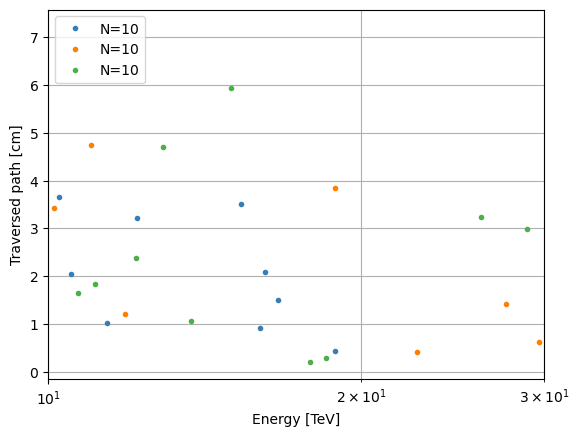

In [121]:
# Checking sampled points for traversed path

a=0
b=10
energy = np.linspace(5.,700.,1000)
cs_CsI_array = np.full(len(energy), CsI_truecs)
for E, x, color in zip(pow_dists[a:b],lambda_measured[a:b], colors[a:b]):
    #E_masked = np.ma.masked_where((x>1.0) | (x<3.0),E)
    x_masked = np.ma.masked_where((x<1.0) | (x>3.0),x)    
    #plt.plot(E, x_masked, color='blue', marker='*',label='masked', linestyle='None')
    plt.plot(E, x, color=color, marker='.',alpha=1,label='N={}'.format(len(E)), linestyle='None')
plt.xlabel('Energy [TeV]')
plt.ylabel('Traversed path [cm]')
plt.semilogx()
plt.xlim(10,30)
#plt.ylim(-1,2)
plt.grid(which='both',axis='both')
plt.legend();

In [122]:
plt.close()

Binning events in log energy and calculating mean traversed path per bin as well as the uncertainty in the mean

In [123]:
histograms = []
binned_traversedpath = []
binned_traversedpatherror = []
traversedpath_rms_perbin = []

for Edist, lambdadist in zip(pow_dists,lambda_measured):
    binneddists = histogramlogspacing(Edist,lambdadist)
    histograms.append(binneddists[0])
    binned_traversedpath.append(binneddists[1])
    binned_traversedpatherror.append(binneddists[2])
    traversedpath_rms_perbin.append(binneddists[3])

/home/vhep/mescob11/fermi/prelim_fermi_studies/fermi_bhcs_mc/simple_mc_funcs.py:172: RuntimeWarning: invalid value encountered in scalar divide
  rmse=np.sqrt(np.sum(((binnedlambdas-binnedaveragelambda)**2))/(len(binnedlambdas)-1))
/home/vhep/mescob11/fermi/prelim_fermi_studies/fermi_bhcs_mc/simple_mc_funcs.py:175: RuntimeWarning: divide by zero encountered in scalar divide
  traversedpathrms[arrindex]=(np.sqrt(np.sum(((binnedlambdas)**2))/(len(binnedlambdas)-1)))/np.sqrt(len(binnedlambdas))


Plotting binned average traversed path as a function of energy

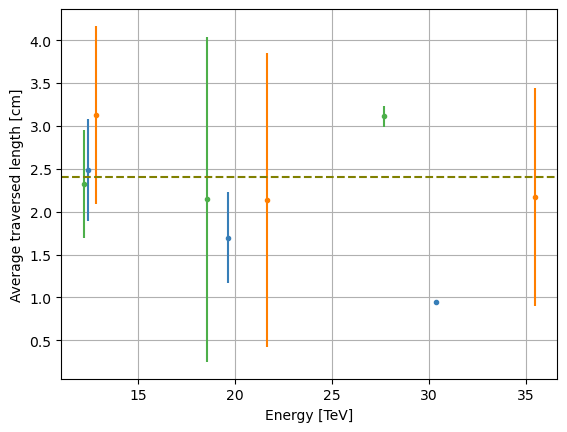

In [131]:
a=0
b=10
for Ehist,x,xerror,color,Nevents in zip(histograms[a:b],
                                        binned_traversedpath[a:b],
                                        binned_traversedpatherror[a:b],
                                        colors[a:b],
                                        pow_dists[a:b]):    
    binwidth = (Ehist[1][1]-Ehist[1][0])
    bincenters = Ehist[1][1:]-binwidth/2
    plt.errorbar(bincenters,
             x,
             yerr=xerror,
             marker='.',linestyle='',
             color=color,
             label=r'$N={}$'.format(len(Nevents)))
plt.axhline(2.4,linestyle='--',
            color='olive',
            label=r'$\lambda_{CsI}=2.40$cm')

plt.ylabel(r'Average traversed length [cm]')
plt.xlabel(r'Energy [TeV]')
# plt.legend()
plt.grid()
# Equally spaced when using log scale
#plt.xscale("log")

In [132]:
plt.close()

Plotting cross section as a function of energy including error bars.

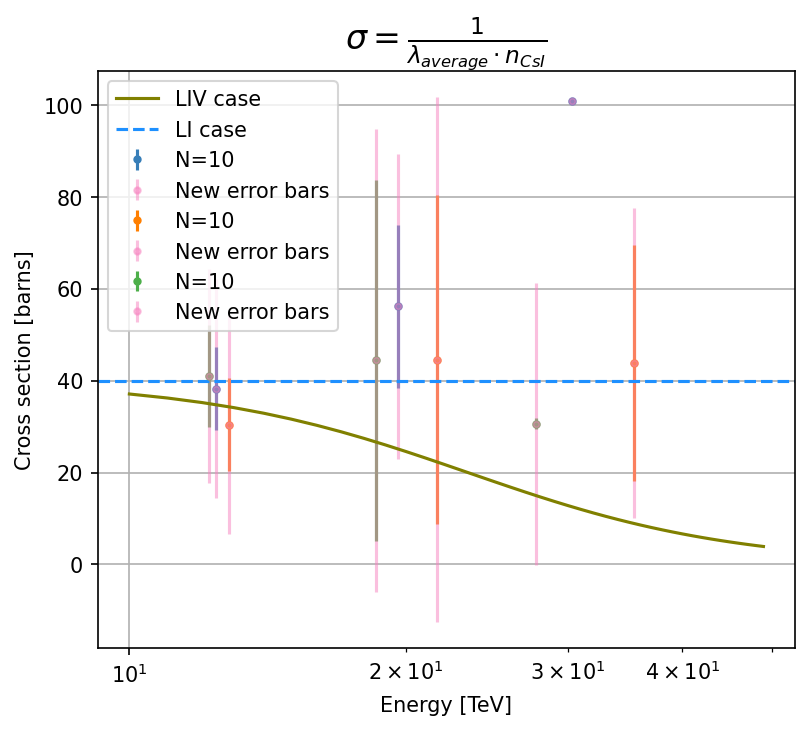

In [133]:
a,b = 0,10
energybins = np.arange(10,50,1)

plt.figure(figsize=(6,5),dpi=150)

cs_CsI_array = np.full(len(energybins), CsI_truecs)

counter=0
for Ehist,x,xerror,color,Nevents in zip(histograms[a:b],
                                        binned_traversedpath[a:b],
                                        binned_traversedpatherror[a:b],
                                        colors[a:b],
                                        pow_dists[a:b]):  
    
    binwidth = (Ehist[1][1]-Ehist[1][0])
    bincenters = Ehist[1][1:]-binwidth/2
    ##########################################################################
    # Cross section and error calculation
    sigma, assymetric_error=experimental_cs(x,xerror) 
    # Standard error
    properror = sigma*np.sqrt(np.square(xerror/x))

    ##############################################################################
    # Plotting

    # Standard error
    plt.errorbar(bincenters,
                sigma*1e24,
                yerr=properror*1e24,
                marker='.',
                linestyle='',
                color=color,
                label=r'N={}'.format(len(Nevents)),
                alpha=1)
    # Lyons 1991 error
    # plt.errorbar(bincenters,
    #             sigma*1e24,
    #             yerr=assymetric_error*1e24,
    #             marker='.',
    #             linestyle='',
    #             color=colors[3],
    #             alpha=1,
    #             label='New error bars'
    #             )
    # RMS as error bars
    # temp_errors=sigma*np.sqrt(np.square(traversedpath_rms_perbin[counter]/x))
    # plt.errorbar(bincenters,
    #             sigma*1e24,
    #             yerr=temp_errors*1e24,
    #             marker='.',
    #             linestyle='',
    #             color=colors[3],
    #             alpha=0.5,
    #             label='New error bars'
    #             )
    # counter+=1

plt.plot(energybins, 1e24*cs_CsI_array*SB_factor(energybins,n=1,E_LIV=1.22e16), color='olive',label='LIV case', marker='')
plt.axhline(y=1e24*CsI_truecs, color='dodgerblue', label='LI case',marker='',linestyle='--',)


plt.ylabel(r'Cross section [barns]')
plt.xlabel(r'Energy [TeV]')
plt.title(r'$\sigma=\frac{1}{\lambda_{average} \cdot n_{CsI}}$', fontsize=16)
#plt.ylim(0,100)
plt.xscale("log")
plt.legend()
plt.grid()

In [897]:
plt.close()

Events above zero 3.0 
 Events below zero 3.0


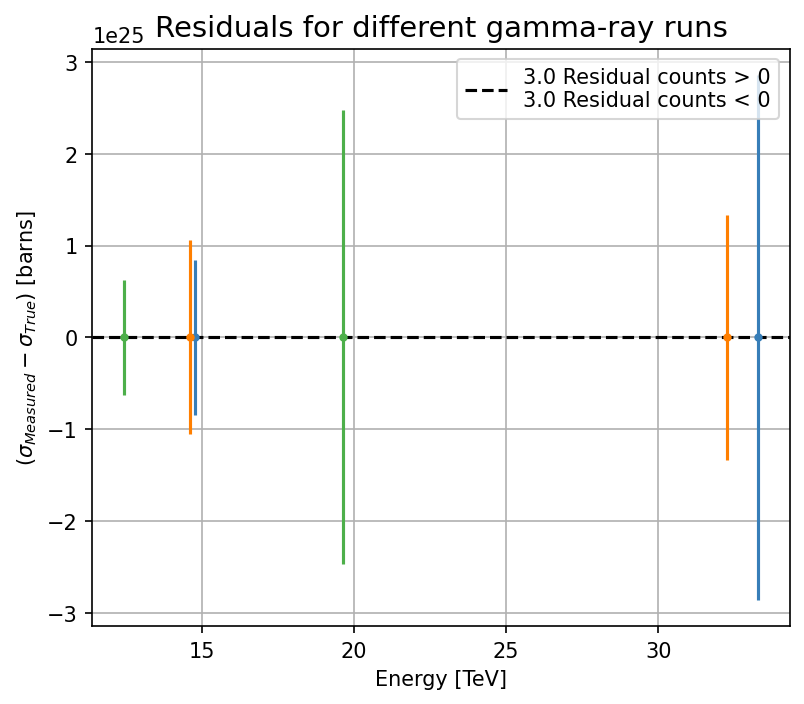

In [898]:
a,b=0,4

plt.figure(figsize=(6,5),dpi=150)

run=1
Eventsabovezero = 0.
Eventsbelozero = 0.
Eabovezero = []
Ebelowzero = []

for Ehist,x,xerror,color,Nevents in zip(histograms[a:b],
                                        binned_traversedpath[a:b],
                                        binned_traversedpatherror[a:b],
                                        colors[a:b],
                                        pow_dists[a:b]):
    binwidth = (Ehist[1][1]-Ehist[1][0])
    bincenters = Ehist[1][1:]-binwidth/2
    
    cs_CsI_array = np.full(len(bincenters), CsI_truecs)*1e24
    
    sigma = 1e24/(x*n_CsI)
    properror = sigma*np.sqrt(np.square(xerror/x))
    
    residual = sigma-cs_CsI_array
    
    mask_gt_0 = residual>0
    mask_lt_0 = residual<0
    
    Eventsabovezero+=np.sum(mask_gt_0)
    Eventsbelozero+=np.sum(mask_lt_0)
    
    for number in residual:
        if number>0:
            Eabovezero.append(number)
        else:
            Ebelowzero.append(number)
    
    plt.errorbar(bincenters,
             residual,
             yerr=properror*1e24,
             marker='.',
             linestyle='',
             color=color)#,
             #label=r'$N={}$'.format(len(Nevents))#r'Run {}'.format(run)#r'$N={}$'.format(len(Nevents))
             #)
    run+=1

plt.axhline(y=0,color='black',linestyle='--',label='{} Residual counts > 0'.format(Eventsabovezero)+
            "\n"+"{} Residual counts < 0".format(Eventsbelozero)
            )
plt.ylabel(r'$( \sigma_{Measured} - \sigma_{True})$ [barns]')
plt.xlabel(r'Energy [TeV]')
plt.legend()
plt.grid()
plt.title(r'Residuals for different gamma-ray runs', fontsize=14);
print("Events above zero {}".format(Eventsabovezero),"\n",
      "Events below zero {}".format(Eventsbelozero))

In [899]:
plt.close()

In [900]:
type(Eabovezero[5])
for element in Eabovezero:
    print(element)    
# if element==inf:
#         \

IndexError: list index out of range

ValueError: supplied range of [0.6956134141633754, inf] is not finite

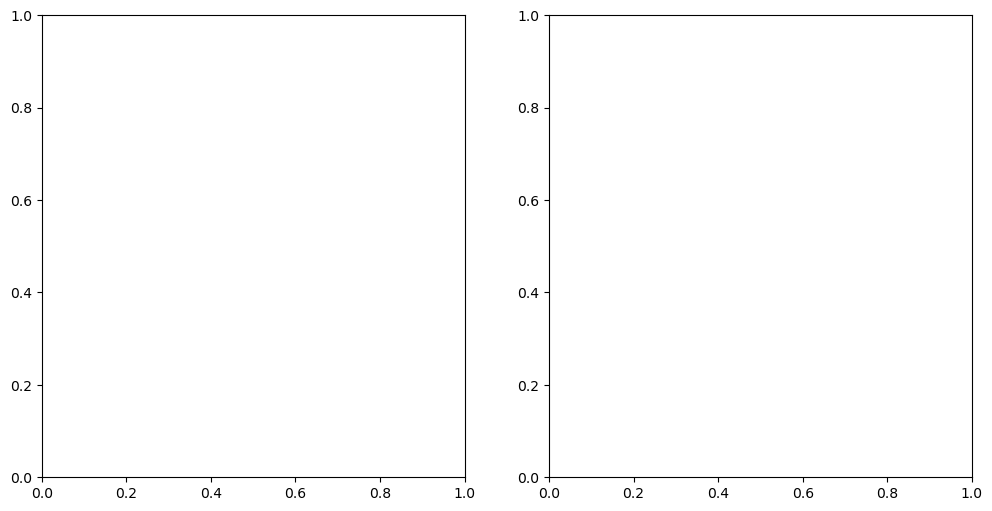

In [ ]:
f, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].hist(Eabovezero)
axs[1].hist(Ebelowzero)


Starting from this point we do something different instead. Bins will be predetermined and we will just fill them up whit whatever amount of photons we want. This is an idealized situation but it will give us a rough idea of how many photons we need to constrain LIV.

In [ ]:
u = np.random.uniform(0,1,1000000)
path_samples = exp_inversecdf(u)
binsizes = [3.,10.,20.,30.,100]
largeNbinsizes = [10.,100.,1000.,10000.,100000]
energybins,averagepathsdists,averagepatherr = filltraversedpathbins(5.5,
                                                20.5,
                                                binsizes,
                                                path_samples,
                                                binspacing=1)
                

In [ ]:
_,largeNaveragepathsdists,largeNaveragepatherr = filltraversedpathbins(5.5,
                                                20.5,
                                                largeNbinsizes,
                                                path_samples,
                                                binspacing=1)

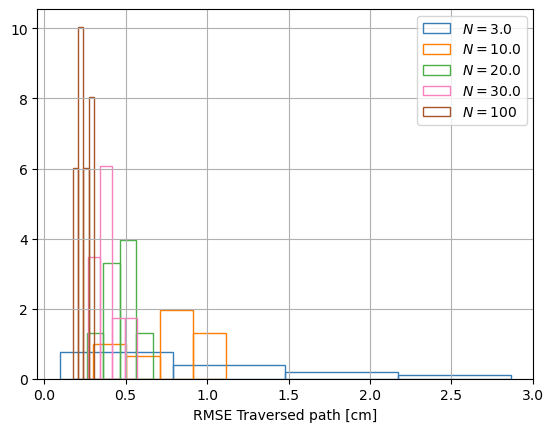

In [ ]:
# Plotting distributions of RMS error for not so large number of events per bin.
a,b=0,5
for dist,bins,color in zip(averagepatherr[a:b],binsizes[a:b],colors[a:b]):
    binsize=math.ceil(math.sqrt(len(dist)))
    plt.hist(dist,
             bins=binsize,
             fill=False,
             density=True,
             edgecolor=color,
             label=r'$N=$'+'{}'.format(bins))
plt.legend()
plt.xlabel('RMSE Traversed path [cm]')
plt.grid()

In [ ]:
plt.close()

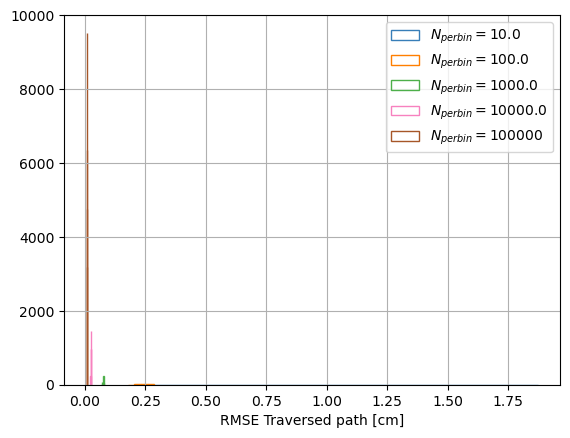

In [ ]:
# Plotting distributions of RMS error for large number of events per bin.
a,b=0,5
for dist,bins,color in zip(largeNaveragepatherr[a:b],largeNbinsizes[a:b],colors[a:b]):
    binsize=math.ceil(math.sqrt(len(dist)))
    plt.hist(dist,
             bins=binsize,
             fill=False,
             density=True,
             edgecolor=color,
             label=r'$N_{perbin}=$'+'{}'.format(bins))
plt.legend()
plt.xlabel('RMSE Traversed path [cm]')
#plt.xlim(2.3,2.5)
plt.grid()

In [ ]:
plt.close()

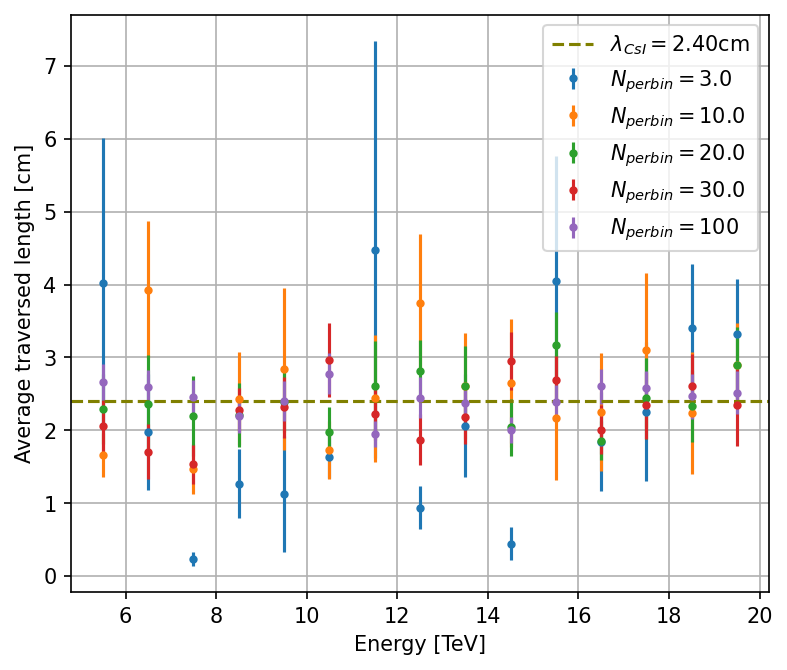

In [ ]:
# Plotting average traversed path with not so large number of events per bin as a function of energy.
a,b = 0,5
plt.figure(figsize=(6,5),dpi=150)
for x,rmse,bin,color in zip(averagepathsdists[a:b],
                            averagepatherr[a:b],
                            binsizes[a:b],
                            colors[a:b]):
    
    plt.errorbar(energybins,
                 x,
                 yerr=rmse,
                 marker='.',linestyle='',
                 label=r'$N_{perbin}=$'+'{}'.format(bin))

plt.axhline(2.4,linestyle='--',
            color='olive',
            label=r'$\lambda_{CsI}=2.40$cm')

plt.ylabel(r'Average traversed length [cm]')
plt.xlabel(r'Energy [TeV]')
plt.legend()
plt.grid()

In [ ]:
plt.close()

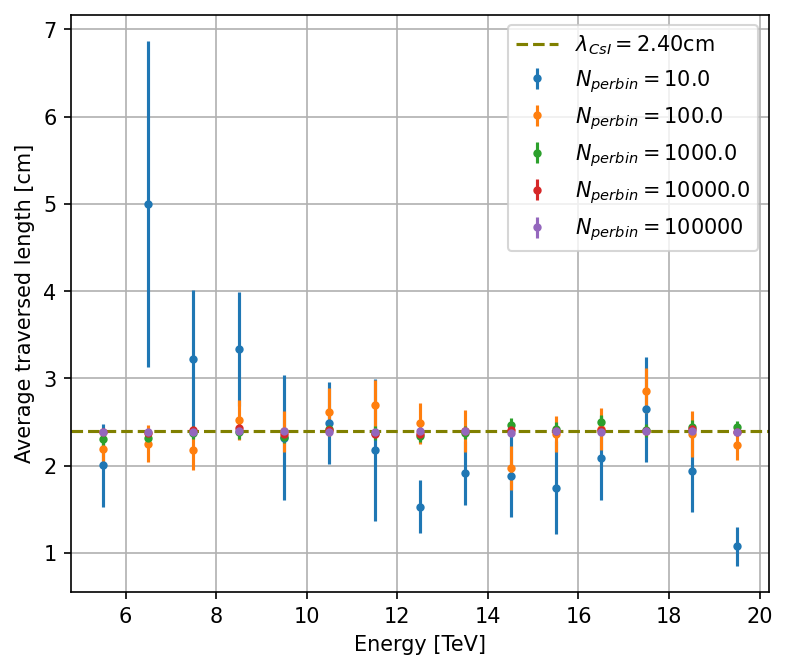

In [ ]:
# Plotting average traversed path with large number of events per bin as a function of energy.

a,b = 0,5
plt.figure(figsize=(6,5),dpi=150)
for x,rmse,bin,color in zip(largeNaveragepathsdists[a:b],
                            largeNaveragepatherr[a:b],
                            largeNbinsizes[a:b],
                            colors[a:b]):
    
    plt.errorbar(energybins,
                 x,
                 yerr=rmse,
                 marker='.',linestyle='',
                 label=r'$N_{perbin}=$'+'{}'.format(bin))

plt.axhline(2.4,linestyle='--',
            color='olive',
            label=r'$\lambda_{CsI}=2.40$cm')

plt.ylabel(r'Average traversed length [cm]')
plt.xlabel(r'Energy [TeV]')
plt.legend()
plt.grid()

In [ ]:
plt.close()

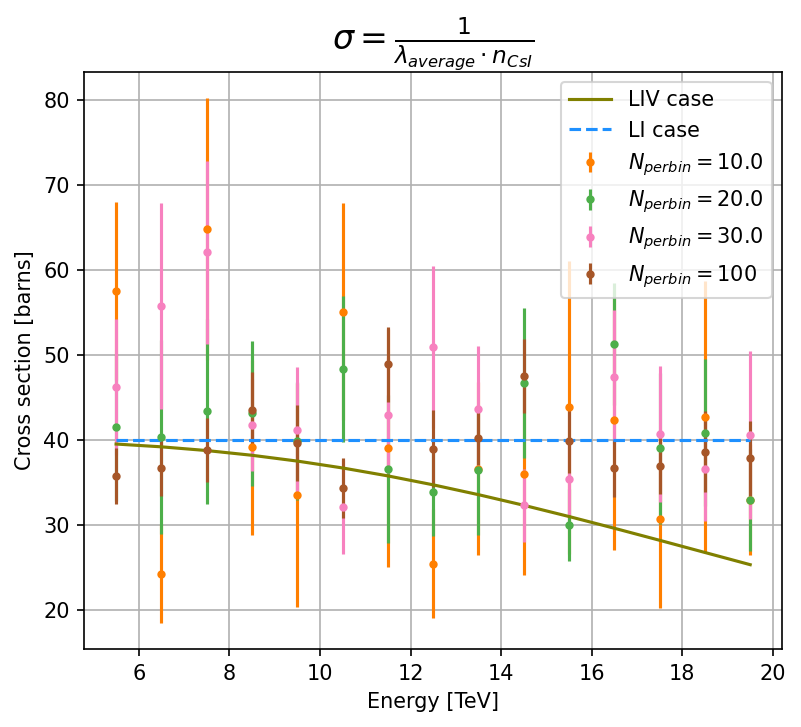

In [ ]:
# Plotting cross section with not so large number of events per bin as a function of energy.
a,b = 1,5
plt.figure(figsize=(6,5),dpi=150)

cs_CsI_array = np.full(len(energybins), CsI_truecs)

for path,patherr,bin,color in zip(averagepathsdists[a:b],
                                  averagepatherr[a:b],
                                  binsizes[a:b],
                                  colors[a:b]):
    sigma = 1/(path*n_CsI)
    errorprop = sigma*np.sqrt(np.square(patherr/path))
    plt.errorbar(energybins,
                sigma*1e24,
                yerr=errorprop*1e24,
                marker='.',
                linestyle='',
                color=color,
                label=r'$N_{perbin}=$'+'{}'.format(bin))

plt.plot(energybins, 1e24*cs_CsI_array*SB_factor(energybins,n=1,E_LIV=1.22e16), color='olive',label='LIV case', marker='')
plt.plot(energybins, 1e24*cs_CsI_array, color='dodgerblue', label='LI case',marker='',linestyle='--',)

plt.ylabel(r'Cross section [barns]')
plt.xlabel(r'Energy [TeV]')
plt.title(r'$\sigma=\frac{1}{\lambda_{average} \cdot n_{CsI}}$', fontsize=16)
#plt.ylim(20,60)
plt.legend()
plt.grid()

In [ ]:
plt.close()

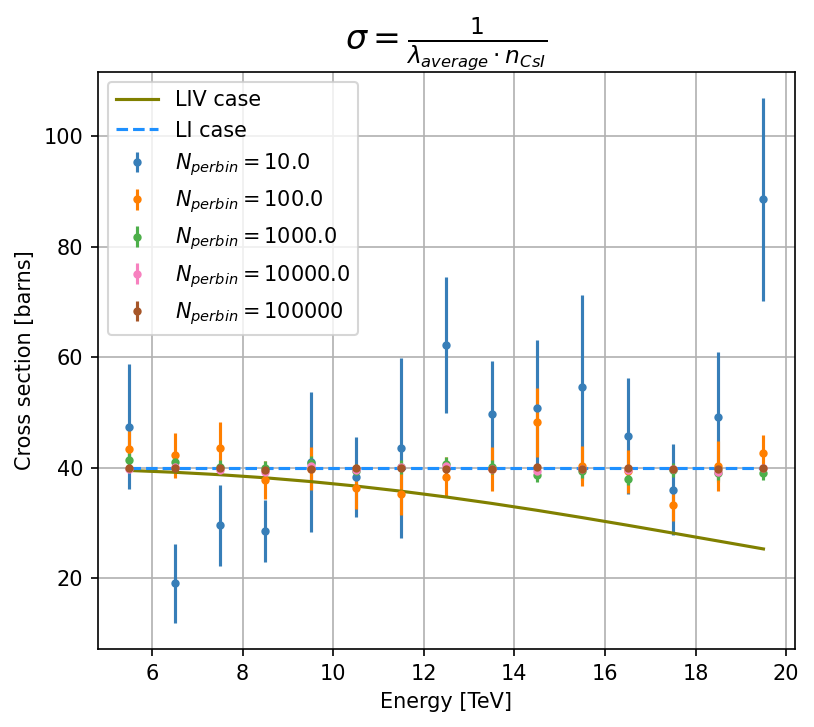

In [ ]:
# Plotting cross section with large number of events per bin as a function of energy.
a,b = 0,5
plt.figure(figsize=(6,5),dpi=150)

cs_CsI_array = np.full(len(energybins), CsI_truecs)

for path,patherr,bin,color in zip(largeNaveragepathsdists[a:b],
                                  largeNaveragepatherr[a:b],
                                  largeNbinsizes[a:b],
                                  colors[a:b]):
    sigma = 1/(path*n_CsI)
    errorprop = sigma*np.sqrt(np.square(patherr/path))
    plt.errorbar(energybins,
                sigma*1e24,
                yerr=errorprop*1e24,
                marker='.',
                linestyle='',
                color=color,
                label=r'$N_{perbin}=$'+'{}'.format(bin))

plt.plot(energybins, 1e24*cs_CsI_array*SB_factor(energybins,n=1,E_LIV=1.22e16), color='olive',label='LIV case', marker='')
plt.plot(energybins, 1e24*cs_CsI_array, color='dodgerblue', label='LI case',marker='',linestyle='--',)

plt.ylabel(r'Cross section [barns]')
plt.xlabel(r'Energy [TeV]')
plt.title(r'$\sigma=\frac{1}{\lambda_{average} \cdot n_{CsI}}$', fontsize=16)
#plt.ylim(20,60)
plt.legend()
plt.grid()

In [ ]:
plt.close()